In [1]:
!pip install -q torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip -q install pillow==6.2.1 
!pip -q install mmcv==0.4.3
!pip install PyMuPDF
import fitz
%cd "/content"

     |████████████████████████████████| 723.9 MB 24 kB/s 
     |████████████████████████████████| 4.0 MB 24.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0+cu100 which is incompatible.
     |████████████████████████████████| 324 kB 4.2 MB/s 
     |████████████████████████████████| 185 kB 45.8 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 21102, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 21102 (delta 31), reused 30 (delta 30), pack-reused 21069
Receiving objects: 100% (21102/21102), 24.81 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (14752/14752), done.
Note: checking out '0f33c08d8d46eba8165715a0995841a975badfd4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and 

Streaming output truncated to the last 5000 lines.
   ^~~~~~~~~~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:55:3: note: in expansion of macro ‘CHECK_INPUT’
   CHECK_INPUT(col);
   ^
In file included from /usr/local/lib/python3.7/dist-packages/torch/include/c10/core/Device.h:5:0,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/c10/core/Allocator.h:6,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/ATen/ATen.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/stateful.h:3,
       

     |████████████████████████████████| 2.1 MB 2.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 6.2.1 which is incompatible.
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 2.8 MB/s 
/content


In [1]:
import fitz
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

fatal: destination path 'CascadeTabNet' already exists and is not an empty directory.


In [3]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
100% 664M/664M [00:03<00:00, 170MB/s]


# Convert PDF Page to PNG Format to pass into CascadeTabNet

In [4]:
!pip install PyMuPDF
import fitz

In [5]:
pdffile = input("Enter PDF Path")
doc = fitz.open(pdffile)
pageNumber = int(input("Enter Page Number"))
page = doc.loadPage(pageNumber-1)  # number of page
pix = page.getPixmap()
output = "outfile.png"
pix.writePNG(output)

Enter PDF Path/content/keppel-corporation-limited-annual-report-2018.pdf
Enter Page Number69


# Pass the PNG image through the pretrained model

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))



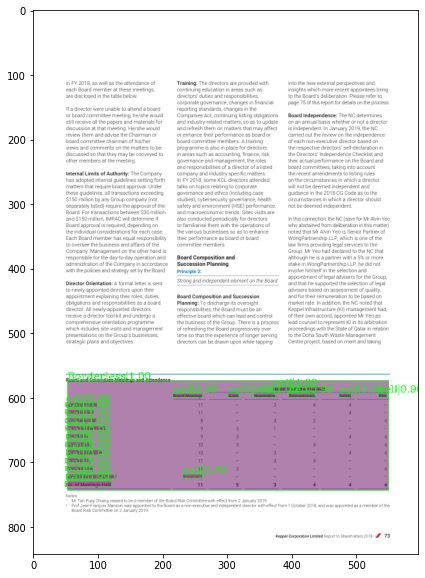

In [6]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')
img = '/content/outfile.png'

result = inference_detector(model, img)
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)



# Print the Obtained Results

In [7]:
print(result)

([array([], shape=(0, 5), dtype=float32), array([[5.0129063e+01, 6.1889935e+02, 9.4080009e+01, 6.2591254e+02,
        9.9304998e-01],
       [5.0880054e+01, 6.3166101e+02, 9.8244209e+01, 6.3894806e+02,
        9.9552488e-01],
       [5.0528744e+01, 6.9352277e+02, 8.8858261e+01, 7.0066254e+02,
        9.8993230e-01],
       [5.1325928e+01, 6.5610547e+02, 8.5074112e+01, 6.6292230e+02,
        9.9457079e-01],
       [5.0551735e+01, 6.6896375e+02, 8.9604904e+01, 6.7648651e+02,
        9.9391103e-01],
       [2.3164011e+02, 7.1844153e+02, 2.6256668e+02, 7.2482343e+02,
        9.9818307e-01],
       [5.0047512e+01, 6.0709009e+02, 9.9661156e+01, 6.1412866e+02,
        9.8719525e-01],
       [5.0225307e+01, 7.0600482e+02, 9.3358444e+01, 7.1283746e+02,
        9.9091667e-01],
       [5.0120678e+01, 6.4340198e+02, 1.1202537e+02, 6.5076532e+02,
        9.9570709e-01],
       [5.1084366e+01, 6.8077893e+02, 1.0739079e+02, 6.8859644e+02,
        9.9214911e-01],
       [3.4159555e+02, 5.9367017e+02, 

In [8]:
!pip freeze > requirements.txt